In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\parva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Step 2: Load the Kaggle dataset
file_path = 'C:/Users/parva/Desktop/ML_Project/archive/twitter_training.csv'
df = pd.read_csv(file_path)
#define the columns of the dataset
df.columns = ['tweet id','entity','sentiment','Tweet content']
# Define the valid sentiment labels
valid_sentiments = ['Positive', 'Negative', 'Neutral']
# Filter out tweets with 'irrelevant' sentiment labels
df = df[df['sentiment'].isin(valid_sentiments)]

# Debug: Confirm only valid sentiments remain
print(f"Unique sentiments after filtering: {df['sentiment'].unique()}")
print(f"Remaining tweets: {len(df)}")

# Display the first few rows of the dataset
print(df.head())

# Step 3: Preprocess the tweets
def clean_tweet(text):
    """Remove URLs, mentions, special characters, and stopwords."""
    if not isinstance(text, str):  # Check if the input is a string
        return ''
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)

# Apply cleaning to the 'text' column
df['cleaned_text'] = df['Tweet content'].apply(clean_tweet)

# Step 4: Encode labels (e.g., positive = 1, neutral = 0, negative = -1)
label_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': 2}
df['label'] = df['sentiment'].map(label_mapping)

Unique sentiments after filtering: ['Positive' 'Neutral' 'Negative']
Remaining tweets: 61691
   tweet id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [4]:
# Optimization
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Step 4: Split the Data
# Prepare features and labels
X = df['cleaned_text']
y = df['label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__max_features': [5000, 10000, 20000],
    'nb__alpha': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'nb__alpha': 0.1, 'vectorizer__max_features': 20000, 'vectorizer__ngram_range': (1, 1)}


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Split the Data
# Prepare features and labels
X = df['cleaned_text']
y = df['label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Vectorize the Text Data
# vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_tfidf = vectorizer.transform(X_test)        # Transform test data



Confusion Matrix:
[[2587  437  654]
 [ 164 3448  557]
 [ 170  313 4009]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      3678
           1       0.82      0.83      0.82      4169
           2       0.77      0.89      0.83      4492

    accuracy                           0.81     12339
   macro avg       0.83      0.81      0.81     12339
weighted avg       0.82      0.81      0.81     12339



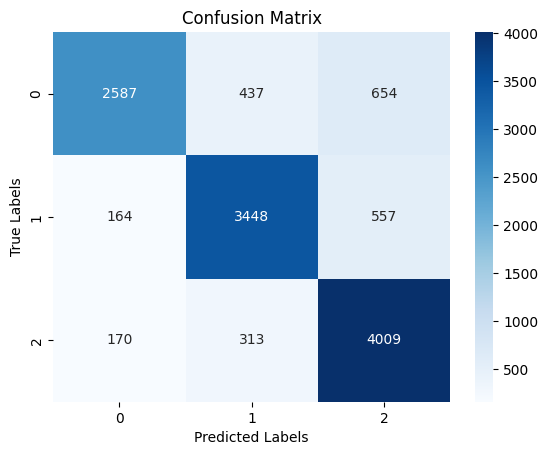

In [6]:
# Step 6: Create and Train the Naive Bayes Model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)  # Train the model

# Step 7: Evaluate the Model on the Test Set
y_pred = model.predict(X_test_tfidf)  # Make predictions

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Visualize the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
